# <font color=darkred>Laboratory 13: "Towards Hypothesis Testing"</font>

In [100]:
# Preamble script block to identify host, user, and kernel
import sys
! hostname
! whoami
print(sys.executable)
print(sys.version)
print(sys.version_info)

DESKTOP-EH6HD63
desktop-eh6hd63\farha
C:\Users\Farha\Anaconda3\python.exe
3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]
sys.version_info(major=3, minor=7, micro=4, releaselevel='final', serial=0)


## Full name: 
## R#: 
## HEX: 
## Title of the notebook
## Date: 

![](http://www.palisade.com/images3/product/risk/en/Distributions_monteCarloSim.jpg)


### Important Terminology:
__Plotting Position:__ An empirical distribution, based on a random sample from a (possibly unknown) probability distribution, obtained by plotting the exceedance (or cumulative) probability of the sample distribution against the sample value. <br>
The exceedance probability for a particular sample value is a function of sample size and the rank of the particular sample. For exceedance probabilities, the sample values are ranked from largest to smallest. The general expression in common use for plotting position is

$$ P = \frac{m - b}{N + 1 -2b}\ $$

where m is the ordered rank of a sample value, N is the sample size, and b is a constant between 0 and 1, depending on the plotting method.<br>

![](https://d3i71xaburhd42.cloudfront.net/5af0d037a082d4fc59aa4129e1996324c0fff6d9/3-Table1-1.png)

__*From:__<br>
__*https://glossary.ametsoc.org/wiki/*__<br>


__Let's work on an example. First, import the necessary packages:__

In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

__Read the "lab13_data.csv" file as a dataset:__

In [140]:
data = pd.read_csv("lab13_data.csv") 
data

,Set1,Set2
0,46.688625,512.459480
1,44.825192,480.551364
2,71.453564,560.502112
3,30.360172,503.885912
4,47.657087,458.124749
...,...,...
95,60.040915,462.122309
96,21.527991,509.909507
97,59.523999,572.309957
98,38.173070,562.580099


__The dataset contains two sets of values: "Set1" and "Set2". Use descriptive functions to learn more the sets.__

In [141]:
# Let's check out set1 and set2
set1 = data['Set1']
set2 = data['Set2']
print(set1)
print(set2)

0     46.688625
1     44.825192
2     71.453564
3     30.360172
4     47.657087
        ...    
95    60.040915
96    21.527991
97    59.523999
98    38.173070
99    39.671168
Name: Set1, Length: 100, dtype: float64
0     512.459480
1     480.551364
2     560.502112
3     503.885912
4     458.124749
         ...    
95    462.122309
96    509.909507
97    572.309957
98    562.580099
99    497.784981
Name: Set2, Length: 100, dtype: float64


In [142]:
set1.describe()

count    100.000000
mean      48.566581
std       15.861475
min       13.660911
25%       38.229562
50%       49.369139
75%       59.580899
max       86.356515
Name: Set1, dtype: float64

In [143]:
set2.describe()

count    100.000000
mean     508.276381
std       47.978391
min      408.244489
25%      470.288351
50%      507.096010
75%      541.199481
max      629.497949
Name: Set2, dtype: float64

__Remember the Weibull Plotting Position formula from last session. Use Weibull Plotting Position formula to plot set1 and set2 quantiles on the same graph.__<br>
__Do they look different? How?__

In [144]:
def weibull_pp(sample): # Weibull plotting position function
# returns a list of plotting positions; sample must be a numeric list
    weibull_pp = [] # null list to return after fill
    sample.sort() # sort the sample list in place
    for i in range(0,len(sample),1):
        weibull_pp.append((i+1)/(len(sample)+1)) #values from the gringorten formula
    return weibull_pp

In [145]:
#Convert to numpy arrays
set1 = np.array(set1)
set2 = np.array(set2)

In [146]:
#Apply the weibull pp function
set1_wei = weibull_pp(set1)
set2_wei = weibull_pp(set2)

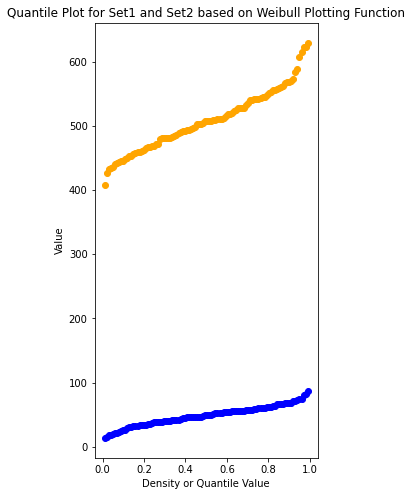

In [147]:
myfigure = matplotlib.pyplot.figure(figsize = (4,8)) # generate a object from the figure class, set aspect ratio
matplotlib.pyplot.scatter(set1_wei, set1 ,color ='blue')
matplotlib.pyplot.scatter(set2_wei, set2 ,color ='orange')
matplotlib.pyplot.xlabel("Density or Quantile Value") 
matplotlib.pyplot.ylabel("Value") 
matplotlib.pyplot.title("Quantile Plot for Set1 and Set2 based on Weibull Plotting Function") 
matplotlib.pyplot.show()

__Do they look different? How?__

__Define functions for Gringorten, Cunnane, California, and Hazen Plotting Position Formulas. Overlay and Plot them all for set 1 and set2 on two different graphs.__<br>

In [148]:
def gringorten_pp(sample): # plotting position function
# returns a list of plotting positions; sample must be a numeric list
    gringorten_pp = [] # null list to return after fill
    sample.sort() # sort the sample list in place
    for i in range(0,len(sample),1):
        gringorten_pp.append((i+1-0.44)/(len(sample)+0.12)) #values from the gringorten formula
    return gringorten_pp

In [149]:
set1_grin = gringorten_pp(set1)
set2_grin = gringorten_pp(set2)

In [150]:
def cunnane_pp(sample): # plotting position function
# returns a list of plotting positions; sample must be a numeric list
    cunnane_pp = [] # null list to return after fill
    sample.sort() # sort the sample list in place
    for i in range(0,len(sample),1):
        cunnane_pp.append((i+1-0.40)/(len(sample)+0.2)) #values from the cunnane formula
    return cunnane_pp

In [151]:
set1_cun = cunnane_pp(set1)
set2_cun = cunnane_pp(set2)

In [152]:
def california_pp(sample): # plotting position function
# returns a list of plotting positions; sample must be a numeric list
    california_pp = [] # null list to return after fill
    sample.sort() # sort the sample list in place
    for i in range(0,len(sample),1):
        california_pp.append((i+1)/(len(sample))) #values from the cunnane formula
    return california_pp

In [153]:
set1_cal = california_pp(set1)
set2_cal = california_pp(set2)

In [154]:
def hazen_pp(sample): # plotting position function
# returns a list of plotting positions; sample must be a numeric list
    hazen_pp = [] # null list to return after fill
    sample.sort() # sort the sample list in place
    for i in range(0,len(sample),1):
        hazen_pp.append((i+1-0.5)/(len(sample))) #values from the cunnane formula
    return hazen_pp

In [155]:
set1_haz = hazen_pp(set1)
set2_haz = hazen_pp(set2)

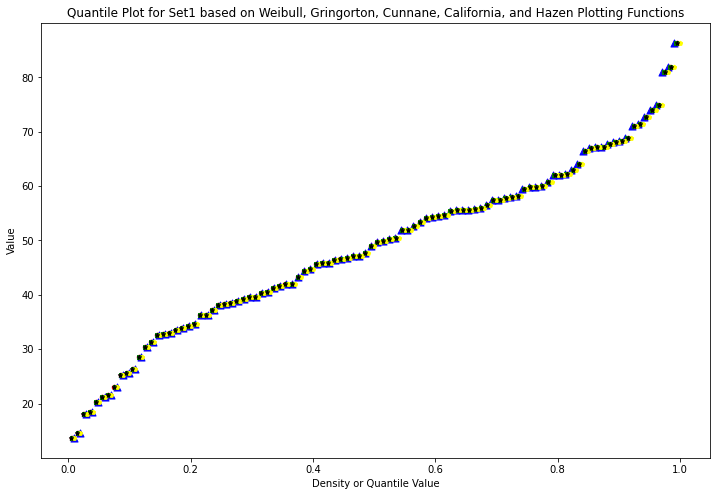

In [156]:
myfigure = matplotlib.pyplot.figure(figsize = (12,8)) # generate a object from the figure class, set aspect ratio
matplotlib.pyplot.scatter(set1_wei, set1 ,color ='blue',
            marker ="^",  
            s = 50)
matplotlib.pyplot.scatter(set1_grin, set1 ,color ='red',
            marker ="o",  
            s = 20)
matplotlib.pyplot.scatter(set1_cun, set1 ,color ='green',
            marker ="s",  
            s = 20)
matplotlib.pyplot.scatter(set1_cal, set1 ,color ='yellow',
            marker ="p",  
            s = 20)
matplotlib.pyplot.scatter(set1_haz, set1 ,color ='black',
            marker ="*",  
            s = 20)
matplotlib.pyplot.xlabel("Density or Quantile Value") 
matplotlib.pyplot.ylabel("Value") 
matplotlib.pyplot.title("Quantile Plot for Set1 based on Weibull, Gringorton, Cunnane, California, and Hazen Plotting Functions") 
matplotlib.pyplot.show()

__Plot a histogram of Set1 with 10 bins.__<br>

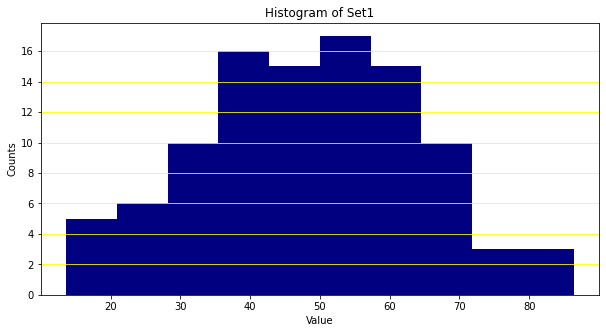

In [157]:
import matplotlib.pyplot as plt
myfigure = matplotlib.pyplot.figure(figsize = (10,5)) # generate a object from the figure class, set aspect ratio

set1 = data['Set1']
set1.plot.hist(grid=False, bins=10, rwidth=1,
                   color='navy')
plt.title('Histogram of Set1')
plt.xlabel('Value')
plt.ylabel('Counts')
plt.grid(axis='y',color='yellow', alpha=1)

__Plot a histogram of Set2 with 10 bins.__<br>

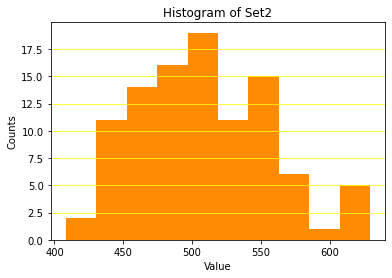

In [158]:
set2 = data['Set2']
set2.plot.hist(grid=False, bins=10, rwidth=1,
                   color='darkorange')
plt.title('Histogram of Set2')
plt.xlabel('Value')
plt.ylabel('Counts')
plt.grid(axis='y',color='yellow', alpha=1)

__Plot a histogram of both Set1 and Set2 and discuss the differences.__<br>

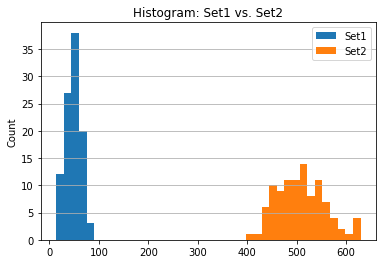

In [159]:
fig, ax = plt.subplots()
data.plot.hist(density=False, ax=ax, title='Histogram: Set1 vs. Set2', bins=40)
ax.set_ylabel('Count')
ax.grid(axis='y')

__The cool 'seaborn' package: Another way for plotting histograms and more!__<br>


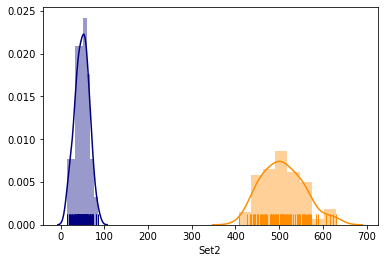

In [160]:
import seaborn as sns
sns.distplot(set1,color='navy', rug=True)
sns.distplot(set2,color='darkorange', rug=True)

### Important Terminology:
__Kernel Density Estimation (KDE):__ a non-parametric way to estimate the probability density function of a random variable. Kernel density estimation is a fundamental data smoothing problem where inferences about the population are made, based on a finite data sample. This can be useful if you want to visualize just the “shape” of some data, as a kind of continuous replacement for the discrete histogram.<br>

__*From:__<br>
__*https://en.wikipedia.org/wiki/Kernel_density_estimation*__<br>
__*https://mathisonian.github.io/kde/* >> A SUPERCOOL Blog!__<br>
__*https://www.youtube.com/watch?v=fJoR3QsfXa0* >> A Nice Intro to distplot in seaborn | Note that displot is pretty much the same thing!__<br>




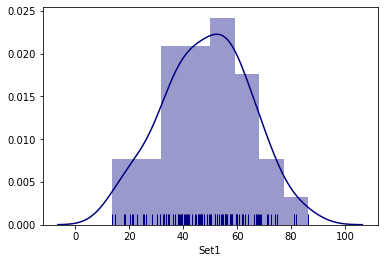

In [161]:
sns.distplot(set1,color='navy',kde=True,rug=True)

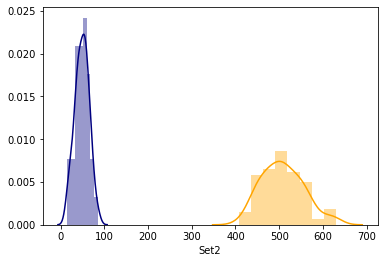

In [162]:
sns.distplot(set1,color='navy',kde=True)
sns.distplot(set2,color='orange',kde=True)

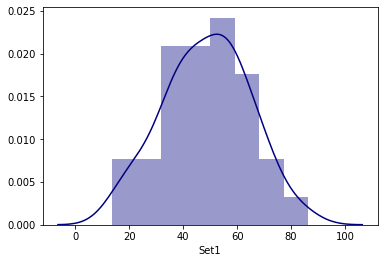

In [132]:
sns.distplot(set1,color='navy',kde=True)

### Important Terminology:
__Empirical Cumulative Distribution Function (ECDF):__ the distribution function associated with the empirical measure of a sample. This cumulative distribution function is a step function that jumps up by 1/n at each of the n data points. Its value at any specified value of the measured variable is the fraction of observations of the measured variable that are less than or equal to the specified value. <br>

__*From:__<br>
__*https://en.wikipedia.org/wiki/Empirical_distribution_function*__<br>

__Fit a Normal distribution data model to both Set1 and Set2. Plot them seperately. Describe the fit.__<br>

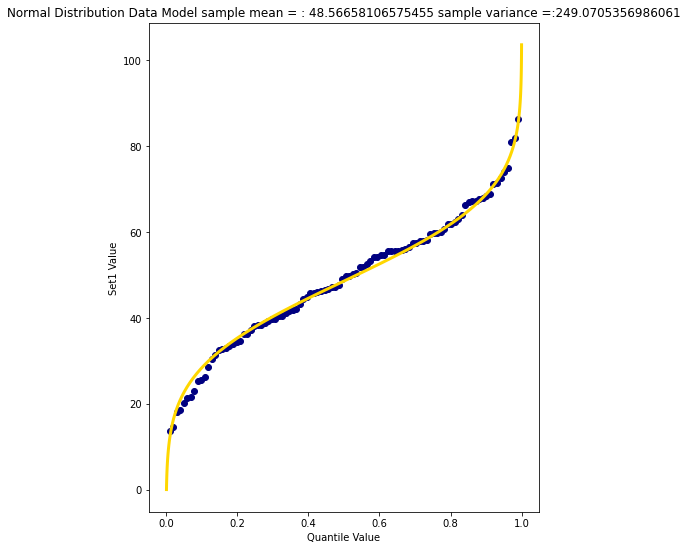

In [163]:
set1 = data['Set1']
set2 = data['Set2']
set1 = np.array(set1)
set2 = np.array(set2)
set1_wei = weibull_pp(set1)
set2_wei = weibull_pp(set2)

# Normal Quantile Function
import math

def normdist(x,mu,sigma):
    argument = (x - mu)/(math.sqrt(2.0)*sigma)    
    normdist = (1.0 + math.erf(argument))/2.0
    return normdist
# For set1
mu = set1.mean() # Fitted Model
sigma = set1.std()
x = []; ycdf = []
xlow = 0; xhigh = 1.2*max(set1) ; howMany = 100
xstep = (xhigh - xlow)/howMany
for i in range(0,howMany+1,1):
    x.append(xlow + i*xstep)
    yvalue = normdist(xlow + i*xstep,mu,sigma)
    ycdf.append(yvalue)
# Fitting Data to Normal Data Model 
# Now plot the sample values and plotting position
myfigure = matplotlib.pyplot.figure(figsize = (7,9)) # generate a object from the figure class, set aspect ratio
matplotlib.pyplot.scatter(set1_wei, set1 ,color ='navy') 
matplotlib.pyplot.plot(ycdf, x, color ='gold',linewidth=3) 
matplotlib.pyplot.xlabel("Quantile Value") 
matplotlib.pyplot.ylabel("Set1 Value") 
mytitle = "Normal Distribution Data Model sample mean = : " + str(mu)+ " sample variance =:" + str(sigma**2)
matplotlib.pyplot.title(mytitle) 
matplotlib.pyplot.show()

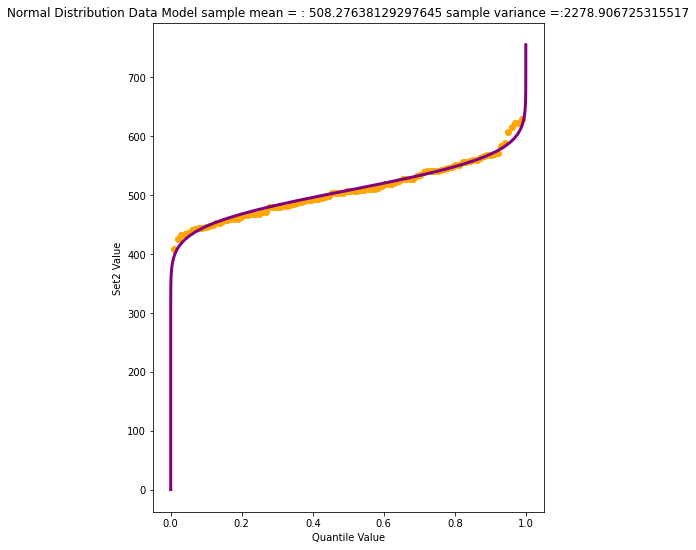

In [164]:
# For set2
mu = set2.mean() # Fitted Model
sigma = set2.std()
x = []; ycdf = []
xlow = 0; xhigh = 1.2*max(set2) ; howMany = 100
xstep = (xhigh - xlow)/howMany
for i in range(0,howMany+1,1):
    x.append(xlow + i*xstep)
    yvalue = normdist(xlow + i*xstep,mu,sigma)
    ycdf.append(yvalue)
# Fitting Data to Normal Data Model 
# Now plot the sample values and plotting position
myfigure = matplotlib.pyplot.figure(figsize = (7,9)) # generate a object from the figure class, set aspect ratio
matplotlib.pyplot.scatter(set2_wei, set2 ,color ='orange') 
matplotlib.pyplot.plot(ycdf, x, color ='purple',linewidth=3) 
matplotlib.pyplot.xlabel("Quantile Value") 
matplotlib.pyplot.ylabel("Set2 Value") 
mytitle = "Normal Distribution Data Model sample mean = : " + str(mu)+ " sample variance =:" + str(sigma**2)
matplotlib.pyplot.title(mytitle) 
matplotlib.pyplot.show()

__Since it was an appropriate fit, we can use the normal distrubation to generate another sample randomly from the same population. Use a histogram with the new generated sets and compare them visually.__<br>

In [135]:
mu1 = set1.mean()
sd1 = set1.std()
mu2 = set2.mean()
sd2 = set2.std()
set1_s = np.random.normal(mu1, sd1, 100)
set2_s = np.random.normal(mu2, sd2, 100)

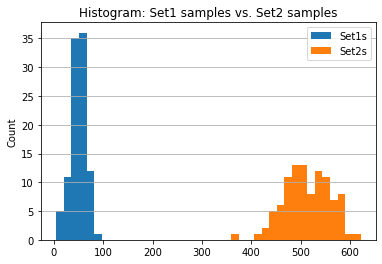

In [136]:
data_d = pd.DataFrame({'Set1s':set1_s,'Set2s':set2_s})

fig, ax = plt.subplots()
data_d.plot.hist(density=False, ax=ax, title='Histogram: Set1 samples vs. Set2 samples', bins=40)
ax.set_ylabel('Count')
ax.grid(axis='y')

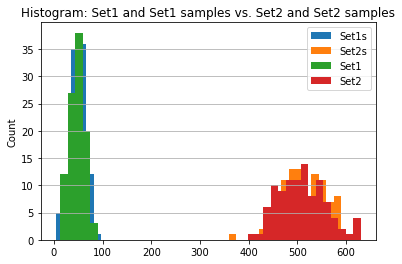

In [137]:

fig, ax = plt.subplots()
data_d.plot.hist(density=False, ax=ax, title='Histogram: Set1 and Set1 samples vs. Set2 and Set2 samples', bins=40)
data.plot.hist(density=False, ax=ax, bins=40)

ax.set_ylabel('Count')
ax.grid(axis='y')

__Use boxplots to compare the four sets. Discuss their differences.__<br>

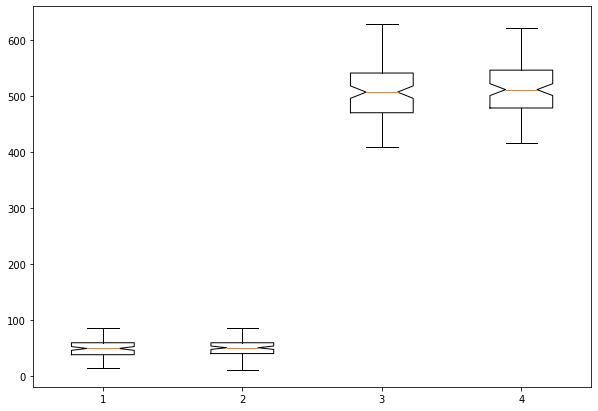

In [138]:
fig = plt.figure(figsize =(10, 7)) 
plt.boxplot ([set1, set1_s, set2, set2_s],1, '')
plt.show()

__The first pair and the second pair look similar while the two pairs look differnet, right? The question is how can we KNOW if two sets are truly (significantly) different or not?__<br>

___
![](https://media2.giphy.com/media/dNgK7Ws7y176U/200.gif) <br>


## Exercise: What is the meaning of "statistically significant difference" ? <br>



#### _Make sure to cite any resources that you may use._ 

![](https://64.media.tumblr.com/5c04ade79d88dde46cfab21ef3f62822/tumblr_nf7id4LDDw1rmagk1o1_640.png)